In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from sklearn.neural_network import MLPClassifier

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D

plt.style.use('ggplot')



In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [4]:
mnist = load_data()
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
(x_train, y_train), (x_test, y_test) = mnist

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

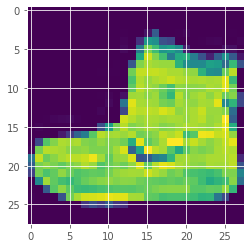

In [9]:
plt.imshow(x_train[0])   # [면, 행, 열]


In [10]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [11]:
y_trainOne = to_categorical(y_train)

In [12]:
model = Sequential()

#  (28-3) / 1 +1 이 32만큼
model.add( Conv2D( 32, kernel_size=(3,3) ,strides=1,input_shape=(28,28,1), activation='relu' ,padding='same' ) )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu' ) )
model.add( MaxPool2D( pool_size=(2,2) ))
model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train,y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.5624 - acc: 0.8642
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2574 - acc: 0.9060
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2091 - acc: 0.9238
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1810 - acc: 0.9330
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1550 - acc: 0.9417
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1335 - acc: 0.9503
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1132 - acc: 0.9580
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0984 - acc: 0.9643
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0872 - acc: 0.9682
Epoch 10/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0776 - acc: 0.9722


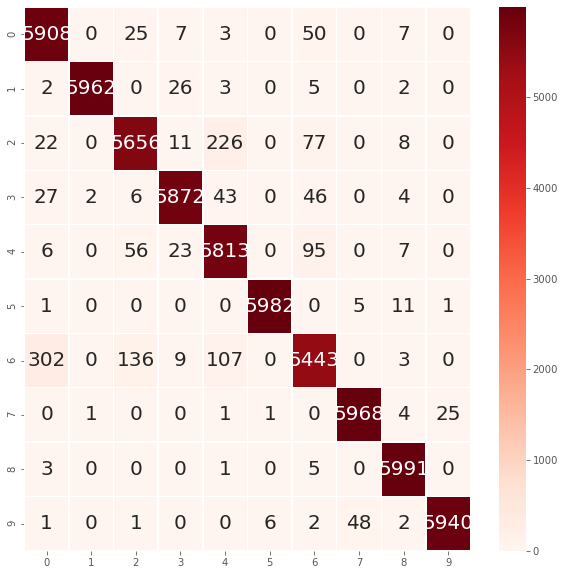

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))

sns.heatmap(confusion_matrix(y_train, model.predict( x_train.reshape(60000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

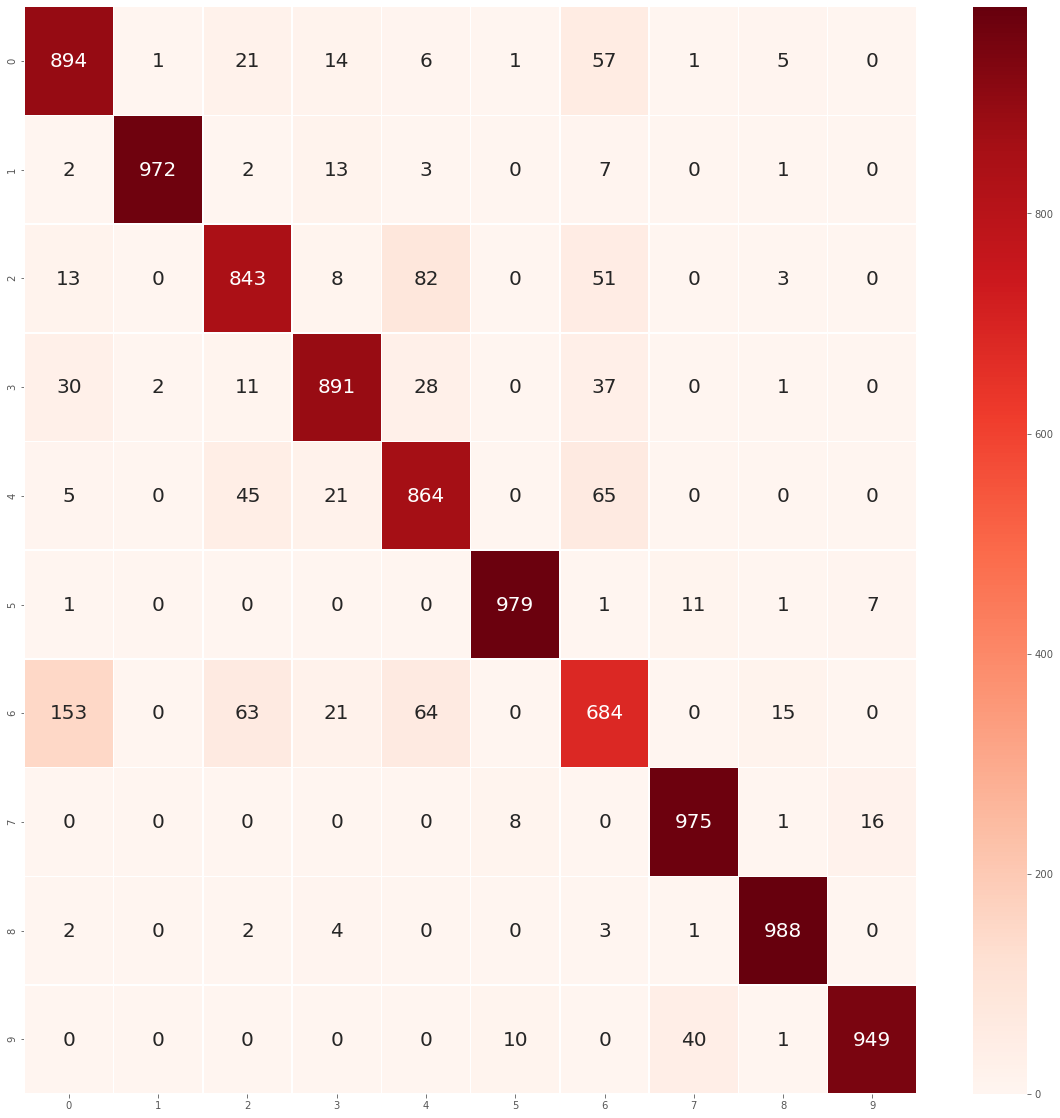

In [14]:
plt.figure(figsize=(20,20))

sns.heatmap(confusion_matrix(y_test, model.predict( x_test.reshape(10000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
            
           );

In [16]:
model.evaluate(x_train,y_trainOne)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0682 - acc: 0.9756


[0.06824301928281784, 0.9755833148956299]

In [18]:
model.evaluate(x_test, to_categorical( y_test) )

313/313 [==============================] - 2s 6ms/step - loss: 0.4997 - acc: 0.9039


[0.49971985816955566, 0.9039000272750854]